In [1]:
datadir='/data'
prefix='/opt/callc/rt'

import pandas as pd
from os import chdir
from main import make_preds
from moldescriptors import get_features

In [2]:
valp = pd.read_excel('validation.xls',sheet_name='Validation dataset POS')
valp = valp.drop(valp[valp['RT'].isna()].index)[['Name','SMILES','RT']]
valp.RT *= 60

In [3]:
valp

,Name,SMILES,RT
0,Benfuracarb,CCOC(=O)CCN(SN(C)C(=O)OC1=CC=CC2=C1OC(C)(C)C2)...,814.2
1,Ethiofencarb,CCSCC1=C(OC(=O)NC)C=CC=C1,580.2
2,Chlortoluron,CN(C)C(=O)NC1=CC(Cl)=C(C)C=C1,588.0
3,Diflubenzuron,FC1=CC=CC(F)=C1C(=O)NC(=O)NC1=CC=C(Cl)C=C1,734.4
4,Diuron,CN(C)C(=O)NC1=CC(Cl)=C(Cl)C=C1,616.8
5,Fenobucarb,CCC(C)C1=CC=CC=C1OC(=O)NC,663.0
6,Flufenoxuron,FC1=CC=CC(F)=C1C(=O)NC(=O)NC1=C(F)C=C(OC2=C(Cl...,857.4
7,Hexaflumuron,FC(F)C(F)(F)OC1=C(Cl)C=C(NC(=O)NC(=O)C2=C(F)C=...,802.8
8,Indoxacarb,COC(=O)N(C(=O)N1CO[C@]2(CC3=C(C=CC(Cl)=C3)C2=N...,798.6
9,Isoprocarb,CNC(=O)OC1=C(C=CC=C1)C(C)C,607.8


In [4]:
trainpos = pd.read_csv('train_positive.tsv',sep='\t')
trainpos

,SMILES,Theor. m/z ESI+,RT,Diversity Selection Rank,Unnamed: 4
0,FC1=CC=CC(F)=C1C(=O)NC(=O)NC1=CC(Cl)=C(OC2=NC=...,539.97024,876.6,1,NaN
1,CO[C@@H]1C[C@@H](C[C@H]2CC[C@H](C)[C@@H](O2)[C...,725.48344,921.6,2,NaN
2,NC1=NC(Cl)=NC(N)=N1,146.02280,162.6,3,NaN
3,CCOP(S)(=O)OCC,171.02393,227.4,4,NaN
4,CCN(CC)C(=O)C1=CC=CC(C)=C1,192.13829,621.0,5,NaN
5,COC1=CC=C(C(=O)C2=CC=CC=C2)C(O)=C1,229.08592,730.8,6,NaN
6,CN(C)C(=O)NC1CCCCCCC1,199.18049,627.0,7,NaN
7,OC(=NCCC1=C(Cl)C=C(C=N1)C(F)(F)F)C1=CC=CC=C1C(...,397.05368,715.8,8,NaN
8,COP(N)(=O)SC,142.00861,174.0,9,NaN
9,[H][C@@]12C[C@H](C[C@@]1([H])[C@]1([H])C=C3C(=...,732.46813,755.4,10,NaN


In [5]:
with open('feats_lib.csv','w'): pass
get_features(infile_name='train_positive.tsv',outfile_name='features_pos.csv',id_index=3,mol_index=0,time_index=2)
pd.read_csv('features_pos.csv')

,IDENTIFIER,time,fr_aryl_methyl,NumAromaticHeterocycles,VSA_EState2,VSA_EState7,PEOE_VSA4,HeavyAtomMolWt,NumRotatableBonds,NumAromaticCarbocycles,...,fr_benzodiazepine,Chi2v,SlogP_VSA1,RingCount,fr_Al_OH_noTert,SMR_VSA2,HallKierAlpha,fr_COO,VSA_EState6,MinAbsEStateIndex
0,1,876.6,0,1,0.0,0.0,13.171245,531.587,4,2,...,0,7.606313,15.370440,3,0,0.000000,-3.15,0,0.0,0.061916
1,2,921.6,0,0,0.0,0.0,0.000000,656.429,9,0,...,0,18.385033,0.000000,6,1,0.000000,-0.89,1,0.0,0.007267
2,3,162.6,0,1,0.0,0.0,14.951936,141.521,0,0,...,0,1.658901,11.467335,1,0,0.000000,-1.10,0,0.0,0.013889
3,4,227.4,0,0,0.0,0.0,0.000000,159.082,4,0,...,0,4.227308,0.000000,0,0,0.000000,0.50,0,0.0,0.361883
4,5,621.0,1,0,0.0,0.0,0.000000,174.138,3,1,...,0,3.346922,0.000000,1,0,0.000000,-1.31,0,0.0,0.123796
5,6,730.8,0,0,0.0,0.0,0.000000,216.151,3,2,...,0,3.578229,4.736863,2,0,0.000000,-2.29,0,0.0,0.071108
6,7,627.0,0,0,0.0,0.0,0.000000,176.134,1,0,...,0,4.385958,5.316789,1,0,0.000000,-0.73,0,0.0,0.051457
7,8,715.8,0,1,0.0,0.0,26.342490,385.630,4,1,...,0,5.556139,0.000000,2,1,0.000000,-2.29,0,0.0,0.060302
8,9,174.0,0,0,0.0,0.0,0.000000,133.068,2,0,...,0,5.337277,5.504174,0,0,0.000000,0.50,0,0.0,1.038194
9,10,755.4,0,0,0.0,0.0,0.000000,666.448,9,0,...,0,16.497526,0.000000,6,0,0.000000,-1.70,0,0.0,0.037985


In [6]:
chdir(datadir)
valp.to_csv('validation_pos.tsv',sep='\t')
get_features(infile_name='validation_pos.tsv',outfile_name='val_features_pos.csv',id_index=0,mol_index=2)
pd.read_csv('val_features_pos.csv')

,IDENTIFIER,fr_aryl_methyl,NumAromaticHeterocycles,VSA_EState2,VSA_EState7,PEOE_VSA4,HeavyAtomMolWt,NumRotatableBonds,NumAromaticCarbocycles,fr_Ar_COO,...,fr_benzodiazepine,Chi2v,SlogP_VSA1,RingCount,fr_Al_OH_noTert,SMR_VSA2,HallKierAlpha,fr_COO,VSA_EState6,MinAbsEStateIndex
0,0,0,0,0.0,0.0,0.000000,380.296,8,1,0,...,0,8.699514,9.473726,2,0,0.000000,-1.93,0,0.0,0.124798
1,1,0,0,0.0,0.0,11.761885,210.193,4,1,0,...,0,4.158653,10.053652,1,0,0.000000,-1.16,0,0.0,0.426900
2,2,1,0,0.0,0.0,0.000000,199.576,1,1,0,...,0,3.695743,5.316789,1,0,0.000000,-1.22,0,0.0,0.162111
3,3,0,0,0.0,0.0,0.000000,301.615,2,2,0,...,0,4.448236,10.633577,2,0,0.000000,-2.47,0,0.0,0.373801
4,4,0,0,0.0,0.0,0.000000,223.018,1,1,0,...,0,3.767868,5.316789,1,0,0.000000,-0.93,0,0.0,0.205195
5,5,0,0,0.0,0.0,0.000000,190.137,3,1,0,...,0,3.486641,10.053652,1,0,0.000000,-1.51,0,0.0,0.394311
6,6,0,0,0.0,0.0,13.171245,477.683,4,3,0,...,0,6.798782,15.370440,3,0,0.000000,-3.73,0,0.0,0.162388
7,7,0,0,0.0,0.0,17.561660,453.081,5,2,0,...,0,6.052883,15.370440,2,0,0.000000,-2.66,0,0.0,0.271279
8,8,0,0,0.0,0.0,15.010230,510.703,3,2,0,...,0,7.984577,9.636773,4,0,0.000000,-3.84,0,0.0,0.053387
9,9,0,0,0.0,0.0,0.000000,178.126,2,1,0,...,0,3.332046,10.053652,1,0,0.000000,-1.51,0,0.0,0.343385


In [7]:
chdir(prefix)
make_preds(reference_infile=datadir + '/features_pos.csv',pred_infile=datadir + '/val_features_pos.csv',outfile=datadir+'/pred_pos')
chdir(datadir)

Total number of train molecules with tR: 175
Training Layer 1 LASSO


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training Layer 1 AdaBoost


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


Training Layer 1 XGBoost


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Training Layer 1 SVR


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Training Layer 1 BRR


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Applying model: mods_l1/FEM_orbitrap_urine_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/FEM_orbitrap_urine_adaboost42.pickle'>
Could not execute: mods_l1/FEM_orbitrap_urine_adaboost42.pickle
Applying model: mods_l1/PFR-TK72_bayesianregr42.pickle
Applying model: mods_l1/FEM_orbitrap_plasma_SVM42.pickle
Applying model: mods_l1/1290SQ_lasso42.pickle
Applying model: mods_l1/MPI_Symmetry_lasso42.pickle
Applying model: mods_l1/MTBLS19_bayesianregr42.pickle
Applying model: mods_l1/MTBLS87_SVM42.pickle
Applying model: mods_l1/MTBLS36_lasso42.pickle
Applying model: mods_l1/MTBLS17_lasso42.pickle
Applying model: mods_l1/MTBLS20_lasso42.pickle
Applying model: mods_l1/Ken_lasso42.pickle
Applying model: mods_l1/Krauss_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/Krauss_adaboost42.pickle'>
Applying model: mods_l1/UniToyama_Atlantis_lasso42.pickle
Applying model: mods_l1/MTBLS38_SVM42.pickle
Applying model: mods_l1/FEM_orbitrap_urine_lasso42.pickle
Applyi

/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator ARDRegression from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVR from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator Lasso from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator Lasso from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results.

Applying model: mods_l1/Ken_SVM42.pickle
Applying model: mods_l1/MTBLS20_bayesianregr42.pickle
Applying model: mods_l1/Eawag_XBridgeC18_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/Eawag_XBridgeC18_adaboost42.pickle'>
Applying model: mods_l1/MTBLS20_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/MTBLS20_adaboost42.pickle'>
Applying model: mods_l1/Vogler_bayesianregr42.pickle
Applying model: mods_l1/MTBLS17_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/MTBLS17_adaboost42.pickle'>
Applying model: mods_l1/MTBLS36_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/MTBLS36_adaboost42.pickle'>
Applying model: mods_l1/Mark_lasso42.pickle
Applying model: mods_l1/Cao_HILIC_adaboost42.pickle
Unable to load: <_io.BufferedReader name='mods_l1/Cao_HILIC_adaboost42.pickle'>
Applying model: mods_l1/Krauss_21_bayesianregr42.pickle
Applying model: mods_l1/IPB_Halle_SVM42.pickle
Applying model: mods_l1/MTBLS4_adaboost42.p

/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator ARDRegression from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator Lasso from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator ARDRegression from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVR from version pre-0.18 when using version 0.20.0. This might lead to breaking code or invalid 

Applying Layer 3...
Layer 3 fitted coefficient (MTBLS20_bayesianregr): 0.017
Layer 3 fitted coefficient (Tohge_bayesianregr): 0.081
Layer 3 fitted coefficient (LIFE_new_bayesianregr): 0.037
Layer 3 fitted coefficient (MASSTRPLAN_adaboos): 0.275
Layer 3 fitted coefficient (MASSTRPLAN_xgb): 0.209
Layer 3 fitted coefficient (MASSTRPLAN_brr): 0.382
Layer 3 sum coefficients: 1.002
Done, predictions can be found here: /data/pred_pos.csv


/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/callc/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [9]:
chdir(datadir)
pred_pos = pd.read_csv('pred_pos.csv')
pred_pos

,identifiers,predictions
0,0,781.215537
1,1,619.923404
2,2,529.649799
3,3,680.266974
4,4,592.468861
5,5,661.178385
6,6,785.735600
7,7,787.645560
8,8,742.687341
9,9,580.866032


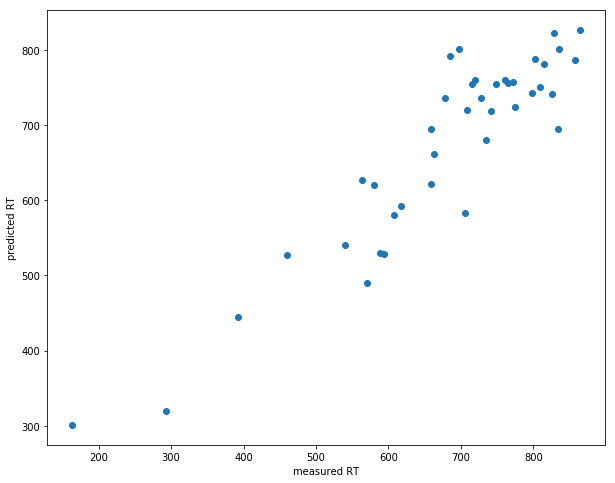

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(valp.RT.values,pred_pos.predictions.values)
plt.xlabel('measured RT')
plt.ylabel('predicted RT')
plt.show()